<a href="https://colab.research.google.com/github/jeevanvishwa02/Data_Science/blob/main/Machine_Learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Basics

# 1.   Import the data, mount your Drive, print df.shape, and use df.info() to look for any missing values.

![MA image](https://upload.wikimedia.org/wikipedia/commons/7/7e/Towns_income_per_capita_in_MA.jpg)

Figure: Map of locations by per capita income. Areas with higher levels of income are shaded darker.

* https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income')[2]
df.head()

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,"$105,217","$256,300","$250,000+",11261,10769
1,2,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",6279,5891
2,3,Sherborn,Town,Middlesex,"$82,550","$172,750","$177,845",4301,3541
3,4,Brookline,Town,Norfolk,"$77,585","$160,034","$175,833",59180,38431
4,5,Newton,City,Middlesex,"$73,420","$223,444","$164,063",88593,78427


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
type=np.unique(df['Type'],return_counts=True)
type

(array(['City', 'Essex', 'Town'], dtype=object), array([ 47,   1, 249]))

In [ ]:
df.shape
print("There are ",df.shape[0]," rows and ",df.shape[1]," columns in the data")

There are  297  rows and  9  columns in the data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   297 non-null    int64 
 1   Municipality           297 non-null    object
 2   Type                   297 non-null    object
 3   County                 297 non-null    object
 4   Per capitaincome       297 non-null    object
 5   Medianhouseholdincome  297 non-null    object
 6   Medianfamilyincome     297 non-null    object
 7   Population             297 non-null    int64 
 8   Number ofhouseholds    297 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 21.0+ KB


In [ ]:
df.describe().columns

Index(['Rank', 'Population', 'Number ofhouseholds'], dtype='object')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Rank                     0
Municipality             0
Type                     0
County                   0
Per capitaincome         0
Medianhouseholdincome    0
Medianfamilyincome       0
Population               0
Number ofhouseholds      0
dtype: int64

In [ ]:
print("There are",df.duplicated().sum(),"duplicated values in the data")

There are 0 duplicated values in the data


All the columns have 297 as Non Null Values. It means there are no missing values in any column of the data

# 2. Clean the data. Remove special characters like $ , and + and coerce appropriate columns to numeric.

In [ ]:
df.head()

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,"$105,217","$256,300","$250,000+",11261,10769
1,2,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",6279,5891
2,3,Sherborn,Town,Middlesex,"$82,550","$172,750","$177,845",4301,3541
3,4,Brookline,Town,Norfolk,"$77,585","$160,034","$175,833",59180,38431
4,5,Newton,City,Middlesex,"$73,420","$223,444","$164,063",88593,78427


In [ ]:
rep_cols=[col for col in df.columns if col not in df.describe().columns]
rep_cols

['Municipality',
 'Type',
 'County',
 'Per capitaincome',
 'Medianhouseholdincome',
 'Medianfamilyincome']

In [ ]:
df[df.columns[4]].head()

0    $105,217
1     $89,476
2     $82,550
3     $77,585
4     $73,420
Name: Per capitaincome, dtype: object

In [ ]:
for i in range(8):
  print(df[df.columns[i]].nunique())

297
297
3
14
290
287
288
294


In [ ]:
#rep_cols=df.(col for col in df.describe().columns col not in df.describe().columns)
spec_char=['$',',','+','@','#']
for i in range(len(df.columns)):
  if df.columns[i] in rep_cols:
    for j in range(len(spec_char)):
      df[df.columns[i]] = df[df.columns[i]].str.replace(spec_char[j],'') #apply(lambda x: x.replace(spec_char[j], ""))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df.head()

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,105217,256300,250000,11261,10769
1,2,Dover,Town,Norfolk,89476,187829,193750,6279,5891
2,3,Sherborn,Town,Middlesex,82550,172750,177845,4301,3541
3,4,Brookline,Town,Norfolk,77585,160034,175833,59180,38431
4,5,Newton,City,Middlesex,73420,223444,164063,88593,78427


In [ ]:
df['Per capitaincome'] = pd.to_numeric(df['Per capitaincome'])
df['Medianhouseholdincome'] = pd.to_numeric(df['Medianhouseholdincome'])
df['Medianfamilyincome'] = pd.to_numeric(df['Medianfamilyincome'])
df['Population'] = pd.to_numeric(df['Population'])
df['Number ofhouseholds'] = pd.to_numeric(df['Number ofhouseholds'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   297 non-null    int64 
 1   Municipality           297 non-null    object
 2   Type                   297 non-null    object
 3   County                 297 non-null    object
 4   Per capitaincome       297 non-null    int64 
 5   Medianhouseholdincome  297 non-null    int64 
 6   Medianfamilyincome     297 non-null    int64 
 7   Population             297 non-null    int64 
 8   Number ofhouseholds    297 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 21.0+ KB


In [ ]:
df['Type']=np.where(df['Type']=='Essex','Others',df['Type'])

In [ ]:
df['Type'].unique()

array(['Town', 'City', 'Others'], dtype=object)

In [ ]:
catg_columns=['Type']
df2 = pd.get_dummies(df, columns=catg_columns, drop_first=True)
df2.head()


,Rank,Municipality,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds,Type_Others,Type_Town
0,1,Weston,Middlesex,105217,256300,250000,11261,10769,0,1
1,2,Dover,Norfolk,89476,187829,193750,6279,5891,0,1
2,3,Sherborn,Middlesex,82550,172750,177845,4301,3541,0,1
3,4,Brookline,Norfolk,77585,160034,175833,59180,38431,0,1
4,5,Newton,Middlesex,73420,223444,164063,88593,78427,0,0


In [ ]:
df2.columns=['Rank', 'Municipality', 'County', 'Per capitaincome',
       'Medianhouseholdincome', 'Medianfamilyincome', 'Population',
       'Number ofhouseholds', 'Type_Others', 'Type_Town']

# 3. Assign Y = to df['Per capitaincome'].


In [ ]:
Y=df2['Per capitaincome']

# 4. Subset columns for modeling

* Type
* Population
* Number ofhouseholds

  **Useful link for subsetting rows and columns:** https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

In [ ]:
df2.columns

Index(['Rank', 'Municipality', 'County', 'Per capitaincome',
       'Medianhouseholdincome', 'Medianfamilyincome', 'Population',
       'Number ofhouseholds', 'Type_Others', 'Type_Town'],
      dtype='object')

In [ ]:
cols=['Population','Number ofhouseholds','Type_Town','Type_Others']
X=df2[cols]

In [ ]:
import seaborn as sns
# plt.figure(figsize=(15, 10))
# sns.heatmap(df2[['Population','Number ofhouseholds','Type_Town','Type_Essex','Per capitaincome','Medianhouseholdincome', 'Medianfamilyincome']].corr(),annot = True);

# 5. Split into X_train, X_test, y_train, y_test.
Use an 80/20 split, shuffle the data, and random state equal to YOUR STUDENT ID. Print the shape of X_train, X_test, y_train, y_test.

Convert X_train, X_test, y_train and y_test into numpy arrays. Just overwrite the variables with the numpy arrays like we did in class

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size = 0.2,
                                                    shuffle=True, 
                                                    random_state=3016014)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(237, 4) (60, 4) (237,) (60,)


In [ ]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


In [ ]:
pd.DataFrame(X_train).describe()

,0,1,2,3
count,237.000000,237.000000,237.000000,237.000000
mean,19082.632911,8753.873418,0.839662,0.004219
std,23759.020467,11015.447093,0.367695,0.064957
min,117.000000,63.000000,0.000000,0.000000
25%,4945.000000,1844.000000,1.000000,0.000000
50%,11605.000000,4911.000000,1.000000,0.000000
75%,24021.000000,11493.000000,1.000000,0.000000
max,181901.000000,78427.000000,1.000000,1.000000


# 6. Use fit_transform() from MinMaxScaler on X_train. Use transform() to apply the MinMaxScaler to X_test.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# 7. Fit a random forest model on X_train. Call your model object `clf`. 

Then create two new variables, `train_preds` and `test_preds`, which are the predictions from your model. For example, you will use `train_preds = clf.predict(X_train)` for `X_train` . Calculate error metrics of MAE and R2 for train and test results.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR=RandomForestRegressor()


clf=RFR.fit(X_train,y_train)


In [ ]:
train_preds=clf.predict(X_train)
test_preds=clf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

print("R-Sqaured value for Train data is ",round(r2_score(y_train,train_preds),2))
print("R-Sqaured value for Test data is ",round(r2_score(y_test,test_preds),2))

R-Sqaured value for Train data is  0.89
R-Sqaured value for Test data is  0.27


In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE value for Train data is ",round(mean_absolute_error(y_train,train_preds),2))
print("MAE value for Test data is ",round(mean_absolute_error(y_test,test_preds),2))

MAE value for Train data is  2806.12
MAE value for Test data is  8218.58


# 8. Make two scatterplots of actual vs. predicted. One for train results, one for test results. 
With nicely labeled title and axis (like we did in class).

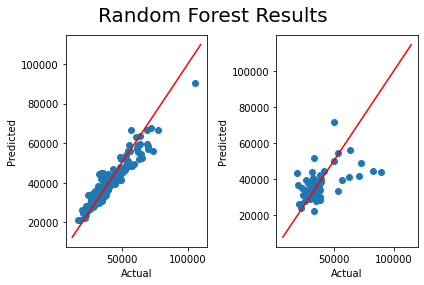

In [ ]:
import matplotlib.pyplot as plt

fig, axes=plt.subplots(1,2)

#fig=plt.figure(figsize=[16,32])

fig.suptitle("Random Forest Results",fontsize=20)


axes[0].scatter(x=y_train,y=train_preds)
axes[0].set_xlabel('Actual',fontsize=10)
axes[0].set_ylabel('Predicted',fontsize=10)

x=np.linspace(*axes[0].get_xlim())
axes[0].plot(x,x,color='red')



axes[1].scatter(x=y_test,y=test_preds)
axes[1].set_xlabel('Actual',fontsize=10)
axes[1].set_ylabel('Predicted',fontsize=10)

x=np.linspace(*axes[0].get_xlim())
axes[1].plot(x,x,color='red')

fig.tight_layout()

fig.subplots_adjust(top=0.88)

plt.show()

# 9. Apply and evaluate your fitted model to ALL town-level data in Connecticut.

This will require you to prep this new dataset the same way as you did for Massachussetts. Luckily, you should be able to copy/paste most code! You can treat this as another holdout partition - use all rows but only the subset of columns that were used in your model. 

Calculate error metrics and make one scatterplot of actual vs. predicted results for this new holdout sample.

In [ ]:
ctData = pd.read_html('https://en.wikipedia.org/wiki/List_of_Connecticut_locations_by_per_capita_income')[2]
ctData.head()

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,"$105,846","$174,611","$211,875",19738,6857
1,2.0,Darien,Town,Fairfield,"$105,846","$208,848","$343,456",20732,6555
2,3.0,Greenwich,Town,Fairfield,"$90,087","$128,153","$167,825",61171,22083
3,4.0,Weston,Town,Fairfield,"$92,794","$219,868","$285,612",10179,3379
4,5.0,Westport,Town,Fairfield,"$97,395","$181,360","$237,353",26391,9740


![CT econ data](https://upload.wikimedia.org/wikipedia/commons/6/6d/Connecticut_Towns_by_Median_Household_Income.png)

Figure: Map of municipalities by median household income (ACS 2015-2019). Areas with higher income are shaded more blue, areas with lower income are shaded more red.

*https://en.wikipedia.org/wiki/List_of_Connecticut_locations_by_per_capita_income

In [ ]:
spec_char=['$',',','+','@','#']
for i in range(len(ctData.columns)):
  if ctData.columns[i] in rep_cols:
    for j in range(len(spec_char)):
      ctData[ctData.columns[i]] = ctData[ctData.columns[i]].str.replace(spec_char[j],'') #apply(lambda x: x.replace(spec_char[j], ""))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [ ]:
ctData.head()

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,105846,174611,211875,19738,6857
1,2.0,Darien,Town,Fairfield,105846,208848,343456,20732,6555
2,3.0,Greenwich,Town,Fairfield,90087,128153,167825,61171,22083
3,4.0,Weston,Town,Fairfield,92794,219868,285612,10179,3379
4,5.0,Westport,Town,Fairfield,97395,181360,237353,26391,9740


In [ ]:
ctData.columns=['Rank', 'Town', 'Type', 'County', 'Per capitaincome',
       'Medianhouseholdincome', 'Medianfamilyincome', 'Population',
       'Number ofhouseholds']

In [ ]:
ctData_new=ctData

In [ ]:
ctData_new['Type'].unique()

array(['Town', 'Borough', 'City', 'State', 'Country'], dtype=object)

In [ ]:
type=np.unique(ctData['Type'],return_counts=True)
type


(array(['Borough', 'City', 'Country', 'State', 'Town'], dtype=object),
 array([  9,  21,   1,   1, 147]))

In [ ]:
others=['Borough', 'Country', 'State']
ctData['Type'] = np.where(ctData['Type'].isin(others), 'Others', ctData['Type'])


In [ ]:
ctData['Type'].unique()

array(['Town', 'Others', 'City'], dtype=object)

In [ ]:
catg_columns=['Type']
ctData2 = pd.get_dummies(ctData, columns=catg_columns, drop_first=True)
ctData2.head()


,Rank,Town,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds,Type_Others,Type_Town
0,1.0,New Canaan,Fairfield,105846,174611,211875,19738,6857,0,1
1,2.0,Darien,Fairfield,105846,208848,343456,20732,6555,0,1
2,3.0,Greenwich,Fairfield,90087,128153,167825,61171,22083,0,1
3,4.0,Weston,Fairfield,92794,219868,285612,10179,3379,0,1
4,5.0,Westport,Fairfield,97395,181360,237353,26391,9740,0,1


In [ ]:
cols=['Population','Number ofhouseholds','Type_Town','Type_Others']
X=ctData2[cols]

In [ ]:
X.head()

,Population,Number ofhouseholds,Type_Town,Type_Others
0,19738,6857,1,0
1,20732,6555,1,0
2,61171,22083,1,0
3,10179,3379,1,0
4,26391,9740,1,0


In [ ]:
#train_preds=clf.predict(X_train)
ct_preds=clf.predict(np.array(X))

In [ ]:
from sklearn.metrics import r2_score

print("R-Sqaured value for CT data is ",round(r2_score(np.array(ctData2['Per capitaincome']),ct_preds),2))

R-Sqaured value for CT data is  -1.53


In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE value for Test data is ",round(mean_absolute_error(np.array(ctData2['Per capitaincome']),ct_preds),2))

MAE value for Test data is  22736.67


# 10. Findings


Model built using Massachussetts economic data was not able to predict Connecticut economic data with desired accuracy  

1.   R-squared value for Connecticut dataset is < 0 indicating the model is not a good fit. It clearly states that model built by using MA data is not able explain any patterns for CT data
2.   Mean Average error is 23407 which tells us that each household per capita income is differed by more than 23407 which is more than country's per captia income
3.   There is another town type 'Borough' in CT which is not captured part of MA dataset. Even though it is not categorized as others, model was not able to predict the per capita income properly




